#### In this notebook, we will perform Exploratory Data Analysis (EDA) on our dataset.

EDA helps us:
- Understand the basic structure of the data
- Find patterns, trends, or unusual values
- Develop initial hypotheses about what features might help classify phishing emails

We will explore:
- The distribution of our target variable (email_type: safe vs phishing)
- Text length differences between phishing and safe emails
- Sentiment score differences between phishing and safe emails

These insights will help inform how we build and interpret our machine learning model later.

DISCLAIMER: Because this project contains real phishing email text, there is inappropriate language in the email text. Please do not inspect this variable if you are not comfortable with that.

In [20]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

In [2]:
df = pd.read_csv('../DATA/sentiment.csv')

In [7]:
df.isnull().sum()

neg           0
neu           0
pos           0
compound      0
email_text    0
email_type    0
dtype: int64

In [8]:
df.describe()

,neg,neu,pos,compound,email_type
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.060209,0.855077,0.084722,0.528981,0.392500
std,0.165581,0.164727,0.064941,0.562039,0.488429
min,0.000000,0.000000,0.000000,-0.999700,0.000000
25%,0.000000,0.828000,0.039000,0.148775,0.000000
50%,0.023000,0.888000,0.075000,0.817200,0.000000
75%,0.053000,0.933000,0.118250,0.966525,1.000000
max,1.000000,1.000000,0.552000,1.000000,1.000000


Let's look at how many emails are labeled as 'safe' and 'phishing.'

Understanding the balance of classes is important:
- If one class is much more common, it could affect model training
- Class imbalance might require special handling (e.g., adjusting evaluation metrics)

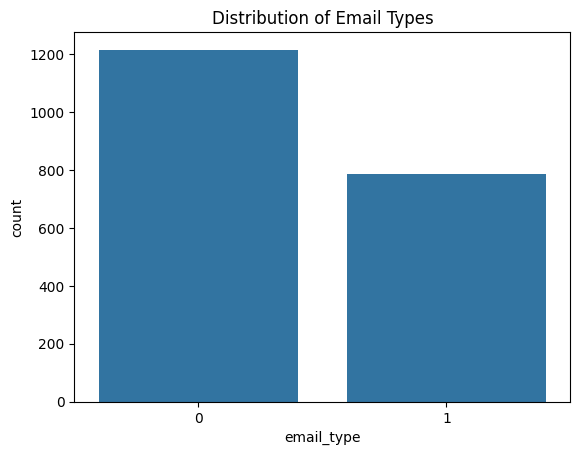

In [9]:
sns.countplot(x=df['email_type'])
plt.title('Distribution of Email Types')
plt.savefig("../OUTPUT/email_dist.png", bbox_inches='tight')
plt.show()

Longer or shorter emails might signal different types of communication.

Here we create a new feature 'text_length' based on the number of characters in each email.
Then we compare the distributions of text length between phishing and safe emails.

Possible insights:
- Are phishing emails generally shorter, to quickly trick the user?
- Are they longer, to sound more legitimate?

Finding patterns here can guide feature engineering or model interpretation later.

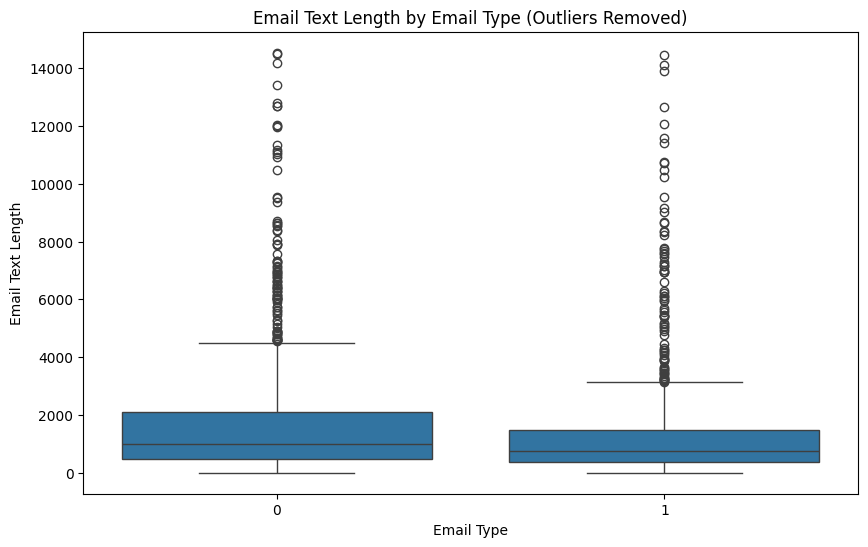

             count         mean          std  min    25%     50%      75%  \
email_type                                                                  
0           1206.0  1692.745439  2061.847118  5.0  468.0  1001.0  2089.50   
1            774.0  1445.155039  2064.780775  5.0  383.0   758.0  1484.75   

                max  
email_type           
0           14529.0  
1           14449.0  


In [14]:
# Calculate Email Text Length
df['email_text_length'] = df['email_text'].str.len()

# Remove outliers (e.g., top and bottom 1%)
lower_bound = df['email_text_length'].quantile(0.01)
upper_bound = df['email_text_length'].quantile(0.99)
df_filtered = df[(df['email_text_length'] >= lower_bound) & (df['email_text_length'] <= upper_bound)]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='email_type', y='email_text_length', data=df_filtered)
plt.title('Email Text Length by Email Type (Outliers Removed)')
plt.xlabel('Email Type')
plt.ylabel('Email Text Length')
plt.savefig("../OUTPUT/email_length.png", bbox_inches='tight')
plt.show()

# Descriptive statistics for email text length by email type.
print(df_filtered.groupby('email_type')['email_text_length'].describe())

Next, we examine whether phishing and safe emails have different emotional tones.

We will look at the distributions of the four sentiment scores:
- 'neg' (negative emotion)
- 'neu' (neutral tone)
- 'pos' (positive emotion)
- 'compound' (overall sentiment)

Comparing these by email type can help us hypothesize:
- Do phishing emails use more negative or urgent language?
- Are safe emails more neutral or positive?

If we see clear differences, it suggests that sentiment features will be useful
for our machine learning model.

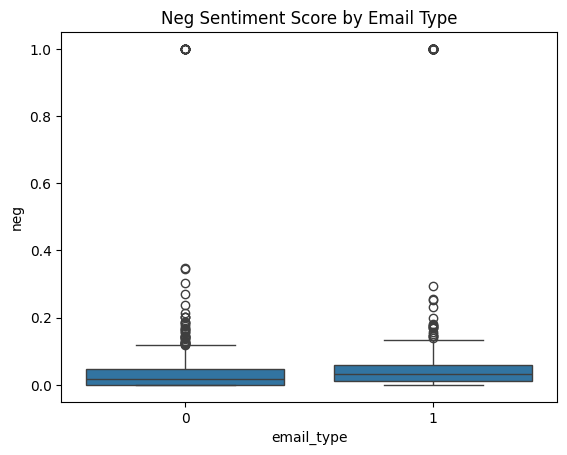

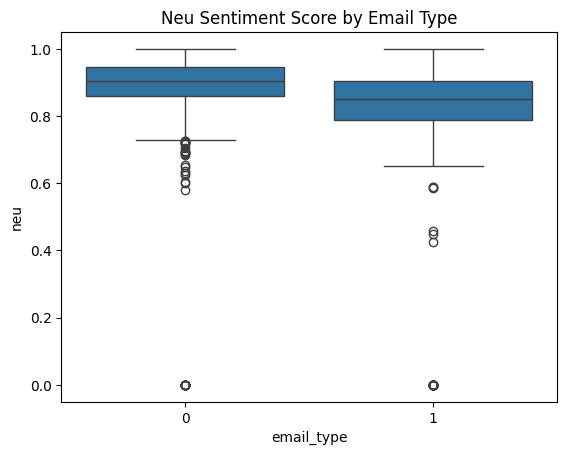

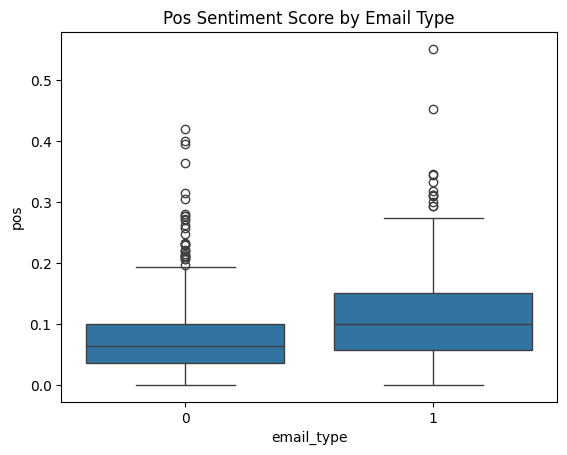

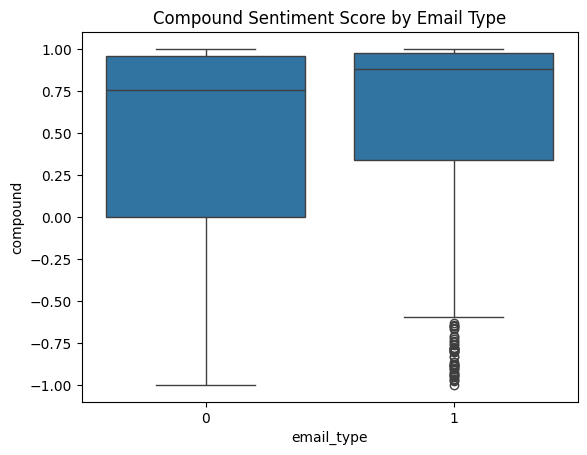

In [15]:
for col in ['neg', 'neu', 'pos', 'compound']:
    sns.boxplot(x='email_type', y=col, data=df)
    plt.title(f'{col.capitalize()} Sentiment Score by Email Type')
    plt.show()

Most common words of different email types?

In [16]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/willmayer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/willmayer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from collections import Counter

phishing_emails = df[df['email_type'] == 1]['email_text']
safe_emails = df[df['email_type'] == 0]['email_text']

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove punctuation and non-alphanumeric characters
    words = [word for word in tokens if word.isalnum()]
    # Remove stopwords (common words lacking meaning)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Process phishing emails
all_phishing_words = []
for email in phishing_emails:
    all_phishing_words.extend(preprocess_text(email))

# Process safe emails
all_safe_words = []
for email in safe_emails:
    all_safe_words.extend(preprocess_text(email))

# Count word frequencies
phishing_word_counts = Counter(all_phishing_words)
safe_word_counts = Counter(all_safe_words)

# Get the top 30 most common words
most_common_phishing = phishing_word_counts.most_common(30)
most_common_safe = safe_word_counts.most_common(30)

print("Most common words in phishing emails:")
for word, count in most_common_phishing:
    print(f"{word}: {count}")

print("\nMost common words in safe emails:")
for word, count in most_common_safe:
    print(f"{word}: {count}")

Most common words in phishing emails:
â: 1274
email: 619
http: 571
1: 539
free: 472
please: 456
2: 454
information: 450
com: 442
one: 436
get: 432
3: 407
money: 402
company: 388
5: 375
time: 365
us: 359
report: 352
make: 348
click: 340
address: 334
people: 322
e: 315
new: 310
order: 308
mail: 303
list: 302
business: 284
send: 282
name: 280

Most common words in safe emails:
enron: 2037
ect: 1449
http: 966
1: 785
would: 757
hou: 705
please: 673
one: 641
2: 624
new: 617
language: 572
information: 572
10: 548
2001: 535
university: 498
also: 497
e: 493
3: 487
subject: 478
like: 459
list: 448
2000: 447
may: 444
com: 434
know: 424
get: 416
time: 407
use: 387
4: 386
11: 379


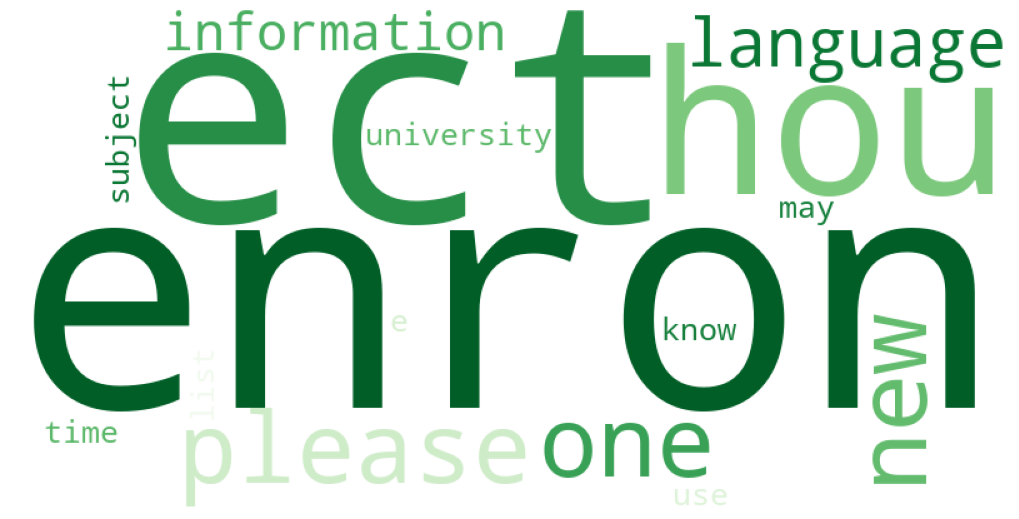

In [21]:
# Create a string of the most common words in safe emails
safe_words_string = ' '.join([word for word, count in most_common_safe])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens_r').generate(safe_words_string)

# Display image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("../OUTPUT/safe_wordcloud.png", bbox_inches='tight')
plt.show()

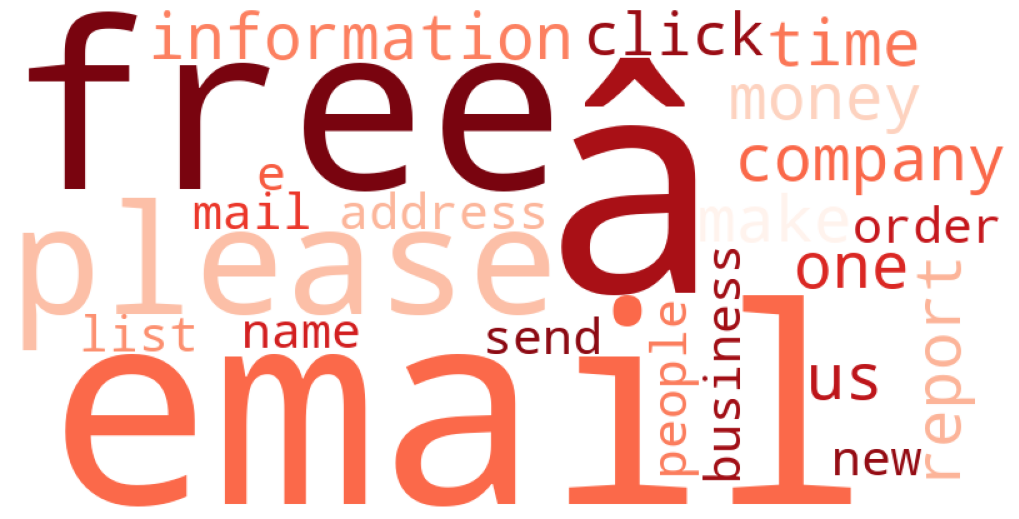

In [22]:
# Create a string of the most common words in phishing emails
phishing_string = ' '.join([word for word, count in most_common_phishing])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds_r').generate(phishing_string)

# Display image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("../OUTPUT/phishing_wordcloud.png", bbox_inches='tight')
plt.show()